In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import numpy as np
import pandas as pd
    
from sympy.geometry import Point, Line
from sympy.vector import CoordSys3D, vector


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'prodesc'
titulo = '22 - Producto Escalar'
curso = '1BC'


x,y = symbols('x, y', real=True)


IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [2]:
N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

display(N.base_vectors())
v = [1,2,0]
base = [i,j,k]
u=(np.array(v)*np.array(base)).sum()
type(u)
u.components
u


In [3]:
w=i+2*j
print(latex(w))
w

\mathbf{\hat{i}_{N}} + (2)\mathbf{\hat{j}_{N}}


In [4]:
N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()


In [5]:
# Página 35 ejercicio 1

texto_ejercicio = r"""Sea 
$\left\lbrace\overrightarrow{ i},\overrightarrow{ j}\right\rbrace$ la base canónica de $V_2$, y los vectores:
$\overrightarrow u=  - 2\overrightarrow i + \overrightarrow j$, 
$\overrightarrow v = 2\overrightarrow i - 3\overrightarrow j$, 
$\overrightarrow w = \overrightarrow i + \overrightarrow j$, 
$\overrightarrow z =  - \overrightarrow i - 3\overrightarrow j$
	Calcular:"""

n_ejercicio = 'p035e01'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

# vectores iniciales correspondientes al texto del enunciado

vectores = [-2*i+j, 2*i-3*j, i+j, -i-3*j]

u,v,w,z = vectores

enunciado_latex = ["""Las coordenadas de cada uno de ellos respecto de la base canónica.
	Las coordenadas de los vectores:$\overrightarrow u + 2\overrightarrow v$, 
    $5\overrightarrow u - \overrightarrow w$, 
    $ - 3\overrightarrow v + 4\overrightarrow w$, 
    $\overrightarrow w - 2\overrightarrow z$""", ]

enunciado = [[u+2*v, 5*u-w, -3*v+4*w, w-2*z]]

solucion = []

for i, s in enumerate(enunciado) : 
    so1 = [tuple(l.components.values()) for l in  vectores]
    so2 = [tuple(l.components.values()) for l in s]
    solucion.append([so1,so2])
    display([so1,so2])

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False), ignore_index=True)


**Sea 
$\left\lbrace\overrightarrow{ i},\overrightarrow{ j}\right\rbrace$ la base canónica de $V_2$, y los vectores:
$\overrightarrow u=  - 2\overrightarrow i + \overrightarrow j$, 
$\overrightarrow v = 2\overrightarrow i - 3\overrightarrow j$, 
$\overrightarrow w = \overrightarrow i + \overrightarrow j$, 
$\overrightarrow z =  - \overrightarrow i - 3\overrightarrow j$
	Calcular:**

In [6]:
# Página 35 ejercicio 2

texto_ejercicio = r"""Estudia la dependencia lineal de los siguientes conjuntos de vectores:"""

n_ejercicio = 'p035e02'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [[(4,12),(2,6)],
                       [(1,2),(3,4)],
                       [(1,1),(-2,-3)]
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[i]+"$"))
    en="Point"+str(s[0])+".is_collinear(Point"+str(s[1])+", Point(0,0))"
    enunciado.append(en)
    solucion.append(S(en))
    display(solucion[i])

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Estudia la dependencia lineal de los siguientes conjuntos de vectores:**

$\overrightarrow{u}=(4, 12) \, \ \overrightarrow{v}=(2, 6)$

True

$\overrightarrow{u}=(1, 2) \, \ \overrightarrow{v}=(3, 4)$

False

$\overrightarrow{u}=(1, 1) \, \ \overrightarrow{v}=(-2, -3)$

False

In [7]:
# otra forma con matrices, aqui dice que el vector 0 y el 1 son linelamente independientes
Matrix([(1,2),(3,4)]).rref()

⎛⎡1  0⎤        ⎞
⎜⎢    ⎥, (0, 1)⎟
⎝⎣0  1⎦        ⎠

In [8]:
# Página 36 ejercicio 9

texto_ejercicio = r"""Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:"""


n_ejercicio = 'p036e09'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(2,-3),(5,4)],
                       [(1,2),(3,4)],
                       [(1,1),(-2,-3)]
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[i]+"$"))
    en=["Point"+str(s[0])+".dot(Point"+str(s[1])+")"]
    en.append(["Point"+str(s[0])+".distance(Point(0,0))","Point"+str(s[1])+".distance(Point(0,0))"])
    angulo = float(deg(acos(float(S(str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+")")))))
    #en.append("acos("+str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+"))")
    en.append(angulo)
    enunciado.append(en)
    solucion.append(latex(S(en)))
    
    display(md("$"+solucion[i]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:**

$\overrightarrow{u}=(2, -3) \, \ \overrightarrow{v}=(5, 4)$

$\left [ -2, \quad \left [ \sqrt{13}, \quad \sqrt{41}\right ], \quad 94.9697407281103\right ]$

$\overrightarrow{u}=(1, 2) \, \ \overrightarrow{v}=(3, 4)$

$\left [ 11, \quad \left [ \sqrt{5}, \quad 5\right ], \quad 10.304846468766\right ]$

$\overrightarrow{u}=(1, 1) \, \ \overrightarrow{v}=(-2, -3)$

$\left [ -5, \quad \left [ \sqrt{2}, \quad \sqrt{13}\right ], \quad 168.69006752598\right ]$

In [9]:
# Página 36 ejercicio 9

texto_ejercicio = r"""Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:"""


n_ejercicio = 'p036e09'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(2,-3),(5,4)],
                       [(1,2),(3,4)],
                       [(1,1),(-2,-3)]
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[i]+"$"))
    en=["Point"+str(s[0])+".dot(Point"+str(s[1])+")"]
    en.append(["Point"+str(s[0])+".distance(Point(0,0))","Point"+str(s[1])+".distance(Point(0,0))"])
    angulo = float(deg(acos(float(S(str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+")")))))
    #en.append("acos("+str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+"))")
    en.append(angulo)
    enunciado.append(en)
    solucion.append(latex(S(en)))
    
    display(md("$"+solucion[i]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:**

$\overrightarrow{u}=(2, -3) \, \ \overrightarrow{v}=(5, 4)$

$\left [ -2, \quad \left [ \sqrt{13}, \quad \sqrt{41}\right ], \quad 94.9697407281103\right ]$

$\overrightarrow{u}=(1, 2) \, \ \overrightarrow{v}=(3, 4)$

$\left [ 11, \quad \left [ \sqrt{5}, \quad 5\right ], \quad 10.304846468766\right ]$

$\overrightarrow{u}=(1, 1) \, \ \overrightarrow{v}=(-2, -3)$

$\left [ -5, \quad \left [ \sqrt{2}, \quad \sqrt{13}\right ], \quad 168.69006752598\right ]$

In [10]:
# Página 36 ejercicio 12

texto_ejercicio = r"""Calcula x, de modo que el producto escalar
de  $\overrightarrow{u}$ y $\overrightarrow{v}$ sea igual a 7, siendo: """


n_ejercicio = 'p036e12'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(3,-5),(x,2)],
                       [(3,1),(2,x)],
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for id, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[id]+"$"))
    u = s[0][0]*i+s[0][1]*j
    v = s[1][0]*i+s[1][1]*j
    enunciado.append(Eq(u.dot(v),7))
    solucion.append(latex(solve(u.dot(v)-7)))
    
    display(md("$"+solucion[id]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Calcula x, de modo que el producto escalar
de  $\overrightarrow{u}$ y $\overrightarrow{v}$ sea igual a 7, siendo: **

$\overrightarrow{u}=(3, -5) \, \ \overrightarrow{v}=(x, 2)$

$\left [ \frac{17}{3}\right ]$

$\overrightarrow{u}=(3, 1) \, \ \overrightarrow{v}=(2, x)$

$\left [ 1\right ]$

In [11]:
# Página 36 ejercicio 13

texto_ejercicio = r"""Dado el vector
$\overrightarrow{u}$, calcula x de modo que sea ortogonal a $\overrightarrow{v}$ siendo: """


n_ejercicio = 'p036e13'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(-5,x),(4,-2)],
                       [(2,x),(3,1)],
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for id, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[id]+"$"))
    u = s[0][0]*i+s[0][1]*j
    v = s[1][0]*i+s[1][1]*j
    enunciado.append(Eq(u.dot(v),0))
    solucion.append(latex(solve(u.dot(v))))
    
    display(md("$"+solucion[id]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Dado el vector
$\overrightarrow{u}$, calcula x de modo que sea ortogonal a $\overrightarrow{v}$ siendo: **

$\overrightarrow{u}=(-5, x) \, \ \overrightarrow{v}=(4, -2)$

$\left [ -10\right ]$

$\overrightarrow{u}=(2, x) \, \ \overrightarrow{v}=(3, 1)$

$\left [ -6\right ]$

In [12]:
# Página 36 ejercicio 13b

texto_ejercicio = r"""Dado el vector
$\overrightarrow{u}$, calcula x de modo que $|\overrightarrow{u}|=\sqrt{34}$ siendo: """


n_ejercicio = 'p036e13b'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(-5,x)],
                       [(2,x)],
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for id, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0]))
    display(md("$"+enunciado_latex[id]+"$"))
    u = s[0][0]*i+s[0][1]*j
    display(u.magnitude())
    enunciado.append(Eq(u.magnitude(),sqrt(34)))
    solucion.append(latex(solve(Eq(u.magnitude(),sqrt(34)))))
    
    display(md("$"+solucion[id]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Dado el vector
$\overrightarrow{u}$, calcula x de modo que $|\overrightarrow{u}|=\sqrt{34}$ siendo: **

$\overrightarrow{u}=(-5, x)$

$\left [ -3, \quad 3\right ]$

$\overrightarrow{u}=(2, x)$

$\left [ - \sqrt{30}, \quad \sqrt{30}\right ]$

In [13]:
# Página 36 ejercicio 14

texto_ejercicio = r"""Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:"""


n_ejercicio = 'p036e14'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(3,2),(1,-5)],
                       [(1,6),(-1/2,-3)],
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+latex(S(s[0]))+r" \, \ \overrightarrow{v}="+latex(S(s[1])))
    display(md("$"+enunciado_latex[i]+"$"))
    en=["Point"+str(s[0])+".dot(Point"+str(s[1])+")"]
    en.append(["Point"+str(s[0])+".distance(Point(0,0))","Point"+str(s[1])+".distance(Point(0,0))"])
    angulo = float(deg(acos(float(S(str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+")")))))
    #en.append("acos("+str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+"))")
    en.append(angulo)
    enunciado.append(en)
    solucion.append(latex(S(en)))
    
    display(md("$"+solucion[i]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:**

$\overrightarrow{u}=\left ( 3, \quad 2\right ) \, \ \overrightarrow{v}=\left ( 1, \quad -5\right )$

$\left [ -7, \quad \left [ \sqrt{13}, \quad \sqrt{26}\right ], \quad 112.38013505196\right ]$

$\overrightarrow{u}=\left ( 1, \quad 6\right ) \, \ \overrightarrow{v}=\left ( -0.5, \quad -3\right )$

$\left [ - \frac{37}{2}, \quad \left [ \sqrt{37}, \quad \frac{\sqrt{37}}{2}\right ], \quad 180.0\right ]$

**Calcula x para que los vectores
$\overrightarrow{u}$ y $\overrightarrow{v}$ formen 60º siendo: **

$\overrightarrow{u}=(3, x) \, \ \overrightarrow{v}=(5, 2)$

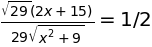

$\left [ \frac{120}{13} + \frac{87 \sqrt{3}}{13}, \quad - \frac{87 \sqrt{3}}{13} + \frac{120}{13}\right ]$

$\overrightarrow{u}=(2, x) \, \ \overrightarrow{v}=(3, 1)$

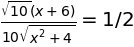

$\left [ 4 + \frac{10 \sqrt{3}}{3}, \quad - \frac{10 \sqrt{3}}{3} + 4\right ]$

$\overrightarrow{u}=(1, 0) \, \ \overrightarrow{v}=(1, x)$

In [ ]:
# Página 36 ejercicio 15

texto_ejercicio = r"""Calcula x para que los vectores
$\overrightarrow{u}$ y $\overrightarrow{v}$ formen 60º siendo: """


n_ejercicio = 'p036e15'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(3,x),(5,2)],
                       [(2,x),(3,1)],
                       [(1,0),(1,x)]
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for id, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[id]+"$"))
    u = s[0][0]*i+s[0][1]*j
    v = s[1][0]*i+s[1][1]*j
    en=Eq(u.dot(v)/(u.magnitude()*v.magnitude()),cos(rad(60)))
    display(en)
    enunciado.append(en)
    solucion.append(latex(solve(en)))
    
    display(md("$"+solucion[id]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


In [ ]:
# Página 36 ejercicio 16

texto_ejercicio = r"""Halla las coordenadas de un cierto vector
$\overrightarrow{u}$, sabiendo que forma un ángulo de 60º con y $\overrightarrow{v}$ y que los 
módulos de ambos vectores, siendo: """


n_ejercicio = 'p036e16'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(2,4)],
                       [(2,3)],
                       [(1,0)]
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for id, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{v}="+str(s[0]))
    display(md("$"+enunciado_latex[id]+"$"))
    u = x*i+y*j
    v = s[0][0]*i+s[0][1]*j
    en=[Eq(u.dot(v)/(u.magnitude()*v.magnitude()),cos(rad(60))),Eq(u.magnitude(),v.magnitude())]
    display(en)
    enunciado.append(en)
    solucion.append(latex(solve(en)))
    
    display(md("$"+solucion[id]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


In [ ]:
en = [Eq(sqrt(5)*(2*x + 4*y)/(10*sqrt(x**2 + y**2)), 1/2), Eq(sqrt(x**2 + y**2), 2*sqrt(5))]
solve(en)


In [ ]:
df_ejercicios.to_csv('ejercicios22.csv', index = False)

In [ ]:
df_ejercicios = pd.read_csv('ejercicios22.csv', index_col= None)

In [ ]:
df_ejercicios

In [ ]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)